# 1. K-Means clustering

## Import

In [134]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load Data

In [135]:
# load data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [136]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Mulai clustering

### ambil data

In [137]:
## ambil data yg akan dicluster, semua kolom kecuali chanel dan region
from sklearn.decomposition import PCA

## fit data terlebih dahulu
sample = data.iloc[:,2:8]
pca= PCA(n_components =2, random_state =1 )
scaled = pca.fit_transform(sample)

### jumlah k optimal

In [138]:
sse={}

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled)
    sse[i]= kmeans.inertia_

C:\Users\RIZALDI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [139]:
sse

{1: 136286672801.6988,
 2: 91919932364.82262,
 3: 59085149481.9905,
 4: 43987034372.52693,
 5: 32043789013.51578,
 6: 26546844443.35255,
 7: 21215893940.24417,
 8: 18312359085.613483,
 9: 16140654415.205925}

Text(0, 0.5, 'SSE')

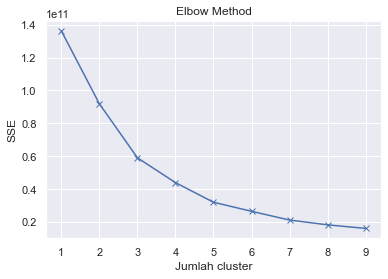

In [140]:
## Elbow Method
pl.plot(list(sse.keys()),list(sse.values()),'b-x')
pl.title('Elbow Method')
pl.xlabel('Jumlah cluster')
pl.ylabel('SSE')

### Hasil kmeans

In [141]:
## mulai KMeans
## pilih cluster terbaik yaitu 5
n_cluster = 5
kmeans = KMeans(n_cluster)

In [142]:
kmeans.fit(scaled)

KMeans(n_clusters=5)

In [143]:
cluster = kmeans.fit_predict(scaled)
cluster

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 1, 3, 4, 2, 1, 2, 2, 1, 1, 2, 3, 3, 4, 2, 2, 3, 3,
       1, 3, 3, 0, 1, 3, 1, 1, 4, 3, 2, 1, 3, 3, 1, 1, 1, 0, 1, 3, 1, 0,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 1, 0, 0, 4,
       1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 2, 1, 3, 1, 3,
       1, 3, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 4, 2, 2, 1, 4, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 2, 3, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       4, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 1, 2, 2, 1,
       1, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 0, 1, 1, 3, 3, 3, 2, 3, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 4, 2, 2,
       2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 4, 4, 1, 1, 2, 1,
       3, 3, 3, 2, 3, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 1, 4, 2, 4, 4,
       1, 2, 2, 4, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2,

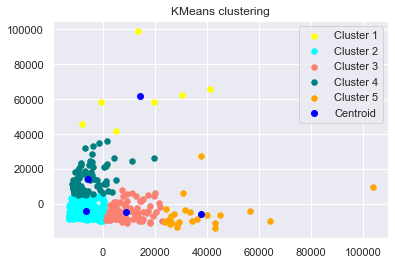

In [153]:
plt.scatter(scaled[cluster ==0,0], scaled[cluster ==0,1], s=30, c='yellow', label='Cluster 1')
plt.scatter(scaled[cluster ==1,0], scaled[cluster ==1,1], s=30, c='aqua', label='Cluster 2')
plt.scatter(scaled[cluster ==2,0], scaled[cluster ==2,1], s=30, c='salmon', label='Cluster 3')
plt.scatter(scaled[cluster ==3,0], scaled[cluster ==3,1], s=30, c='teal', label='Cluster 4')
plt.scatter(scaled[cluster ==4,0], scaled[cluster ==4,1], s=30, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='blue', label='Centroid')
plt.title('KMeans clustering')
plt.legend()
plt.show()


# 2. Agglomerative clustering

## Import library

In [145]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Buat Dendogram

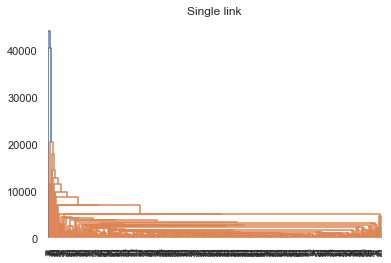

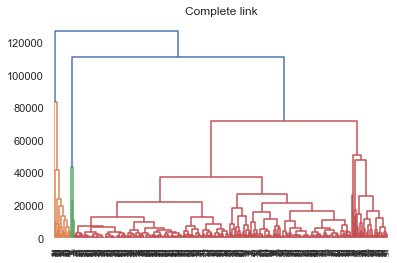

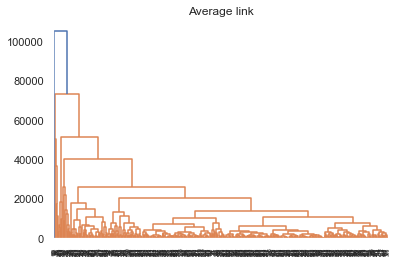

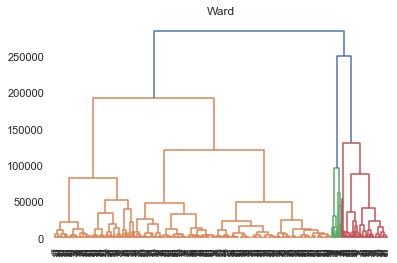

In [146]:
plt.title("Single link")  
single = shc.dendrogram(shc.linkage(scaled, method='single'))
plt.show()

plt.title("Complete link")  
single = shc.dendrogram(shc.linkage(scaled, method='complete'))
plt.show()

plt.title("Average link")  
single = shc.dendrogram(shc.linkage(scaled, method='average'))
plt.show()

plt.title("Ward")  
ward = shc.dendrogram(shc.linkage(scaled, method='ward'))
plt.show()

In [147]:
agg_single  = AgglomerativeClustering(n_clusters = 5, linkage ='single')
y_single = agg_single.fit_predict(scaled)

agg_complete = AgglomerativeClustering(n_clusters = 5, linkage ='complete')
y_complete = agg_complete.fit_predict(scaled)

agg_avg  = AgglomerativeClustering(n_clusters = 5, linkage ='average')
y_avg = agg_avg.fit_predict(scaled)

agg_ward  = AgglomerativeClustering(n_clusters = 5, linkage ='ward')
y_ward = agg_ward.fit_predict(scaled)


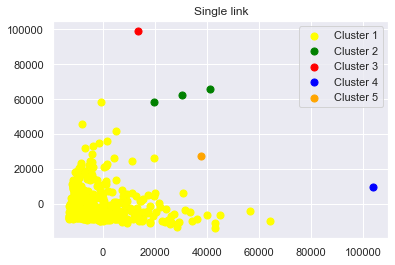

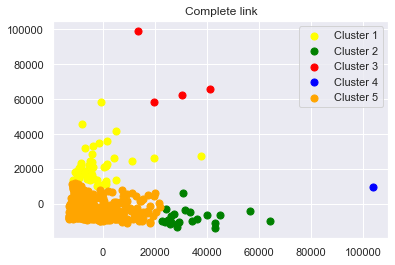

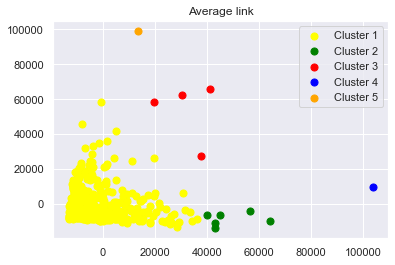

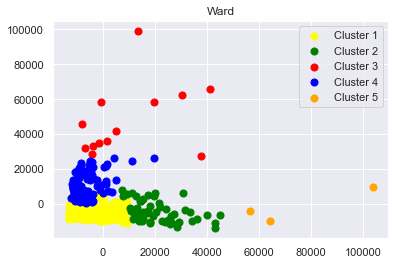

In [154]:
plt.scatter(scaled[y_single ==0,0], scaled[y_single ==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(scaled[y_single ==1,0], scaled[y_single ==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(scaled[y_single ==2,0], scaled[y_single ==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(scaled[y_single ==3,0], scaled[y_single ==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(scaled[y_single ==4,0], scaled[y_single ==4,1], s=50, c='orange', label='Cluster 5')
plt.title('Single link')
plt.legend()
plt.show()

plt.scatter(scaled[y_complete ==0,0], scaled[y_complete ==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(scaled[y_complete ==1,0], scaled[y_complete ==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(scaled[y_complete ==2,0], scaled[y_complete ==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(scaled[y_complete ==3,0], scaled[y_complete ==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(scaled[y_complete ==4,0], scaled[y_complete ==4,1], s=50, c='orange', label='Cluster 5')
plt.title('Complete link')
plt.legend()
plt.show()

plt.scatter(scaled[y_avg ==0,0], scaled[y_avg ==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(scaled[y_avg ==1,0], scaled[y_avg ==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(scaled[y_avg ==2,0], scaled[y_avg ==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(scaled[y_avg ==3,0], scaled[y_avg ==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(scaled[y_avg ==4,0], scaled[y_avg ==4,1], s=50, c='orange', label='Cluster 5')
plt.title('Average link')
plt.legend()
plt.show()

plt.scatter(scaled[y_ward ==0,0], scaled[y_ward ==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(scaled[y_ward ==1,0], scaled[y_ward ==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(scaled[y_ward ==2,0], scaled[y_ward ==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(scaled[y_ward ==3,0], scaled[y_ward ==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(scaled[y_ward ==4,0], scaled[y_ward ==4,1], s=50, c='orange', label='Cluster 5')
plt.title('Ward')
plt.legend()
plt.show()

# 3. Silhouette score

In [660]:
print("Silhouette_score k-Means :",silhouette_score(scaled, kmeans.labels_))
print("Silhouette_score Single Link :",silhouette_score(scaled, agg_single.labels_))
print("Silhouette_score Complete Link :",silhouette_score(scaled, agg_complete.labels_))
print("Silhouette_score Average Link :",silhouette_score(scaled, agg_avg.labels_))
print("Silhouette_score Ward Link :",silhouette_score(scaled, agg_ward.labels_))

Silhouette_score k-Means : 0.451826207086742
Silhouette_score Single Link : 0.6213210422516252
Silhouette_score Complete Link : 0.4925487310652824
Silhouette_score Average Link : 0.6370733727680162
Silhouette_score Ward Link : 0.43159104995188563


## Kesimpulan

Evaluasi `silhoutte score` dipilih yang mendekati 1 sebagai yang terbaik. Data skor masing-masing clustering terlihat bahwa yang paling mendekati 1 adalah `Average Link`. Maka, yang terbaik adalah Agglomerative clustering dengan `average linkage`.